In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

In [5]:
content_path1 = 'administration-buildings.jpg'
style_path1 = '35.jpg'

content_path2 = 'east-bay-sign.jpg'
style_path2 = '33.jpg'

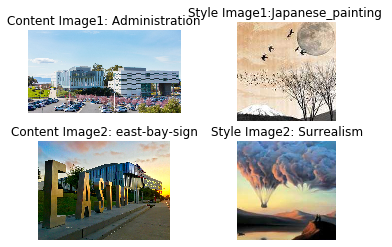

In [6]:
content_image1 = plt.imread(content_path1)
style_image1 = plt.imread(style_path1)

content_image2 = plt.imread(content_path2)
style_image2 = plt.imread(style_path2)

plt.subplot(2, 2, 1)
plt.title('Content Image1: Administration')
plt.axis('off')
plt.imshow(content_image1)

plt.subplot(2, 2, 2)
plt.title('Style Image1:Japanese_painting ')
plt.axis('off')
plt.imshow(style_image1)

plt.subplot(2, 2, 3)
plt.title('Content Image2: east-bay-sign')
plt.axis('off')
plt.imshow(content_image2)

plt.subplot(2, 2, 4)
plt.title('Style Image2: Surrealism')
plt.axis('off')
plt.imshow(style_image2)
plt.show()

In [7]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img

In [8]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)

In [9]:
content_image_tensor1 = image_to_tensor(content_path1)
style_image_tensor1 = image_to_tensor(style_path1)

content_image_tensor2 = image_to_tensor(content_path2)
style_image_tensor2 = image_to_tensor(style_path2)

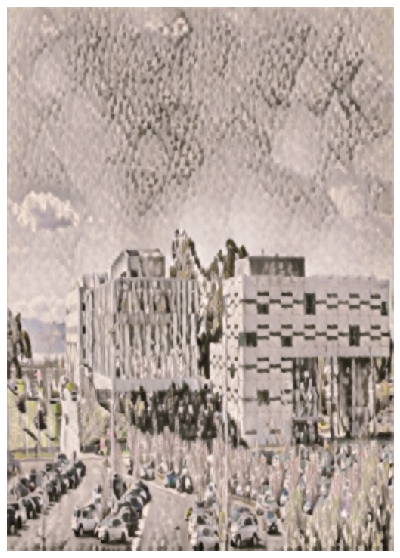

In [10]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
combined_result = hub_module(tf.constant(content_image_tensor1), tf.constant(style_image_tensor1))[0]
tensor_to_image(combined_result)

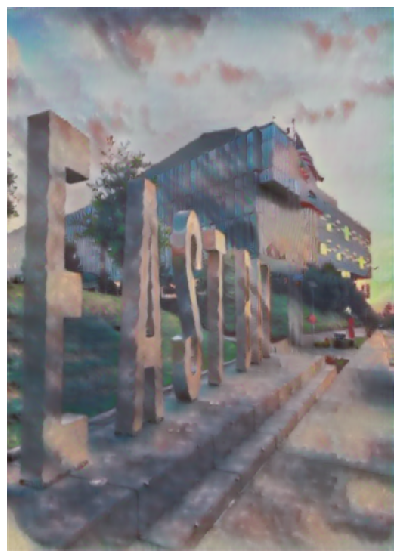

In [11]:
combined_result = hub_module(tf.constant(content_image_tensor2), tf.constant(style_image_tensor2))[0]
tensor_to_image(combined_result)